In [5]:
%load_ext zipline

In [6]:
from zipline.api import order_target, record, symbol

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

In [7]:
%zipline --bundle quantopian-quandl --start 2000-1-1 --end 2020-1-1 -o strat.pickle

C:\Users\Kazuya\anaconda3\envs\zipEnv\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Users\Kazuya\anaconda3\envs\zipEnv\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2008-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.000483,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2008-01-03 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.000966,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2008-01-04 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.025448,0.220179,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2008-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.026276,0.189732,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2008-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.042000,0.177799,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2008-01-09 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.031931,0.201144,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2008-01-10 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.025586,0.196970,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2008-01-11 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.033448,0.184053,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2008-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.025655,0.183959,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2008-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.047104,0.198394,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
def plotGains(myPickle):
    style.use("ggplot")
    backTest= pd.read_pickle(myPickle)
    backTest.portfolio_value.plot()
    plt.show()

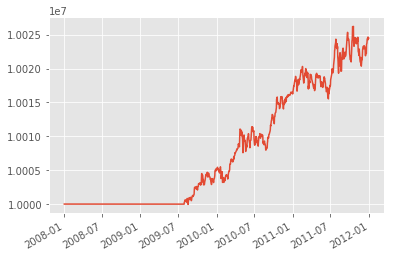

In [3]:
plotGains('strat.pickle')